## Introduction: Getting started with numpy

Today we dip our toes in the waters of numerical processing.
`numpy` ("Numerical Python") is a core library used in pretty much any analysis written in Python. It implements a number of basic linear algebra routines, with the idea that mathmatical operations can be applied to time series and arrays of numbers, similarly to variables in standard programming. Conceptually, numpy borrows substantially from the numerical core of Matlab, which itself is built on the venerated LINPACK library.

`matplotlib` is a widely used plotting library, which also has its roots in Matlab. Many other plotting libraries exist, and many make prettier pictures, matlplotlib can usually get the job done. 

To illustrate the use of basic numpy and matplotlib functions, we'll perform some basic analysis on spike data recorded from auditory cortex. There are a few quirks around plotting auditory tuning curves that take advantage of a couple optional features in matplotlib, e.g., as tweaking the details of the x axis. While you may not use these specific options all the time, they provide examples of how you can often find little features to make your plots prettier and easier to read.

### Tuning curves

Here's an example frequency tuning curve, which shows the average spike rate evoked by tones of different frequencies for a single neuron in auditory cortex:

<img src="tuning_curve_example.png"/>

### Spike rasters

Here's a spike raster for the same neuron, which gives a bit more information about the dynamics of spontaneous- and sound-evoked activity. Ticks in each row show the time of spikes during a single tone presentation. This plot is complex in that data from mulitple different tones are stacked on top of each other. 

<img src="raster_example.png"/>

### Lecture logistics

After the first class, you should be familiar with the basics of using Jupyter Notebooks. Now you can follow along with the lecture. In a few places, you'll see Exercises, empty cells where you'll need to enter the code. 

### Todays learning objectives

* basics of numpy for vector/array computation
* simple plotting routines using matplotlib
* measure stimulus-evoked firing rate in single neuron data recorded from auditory cortex
* compute and plot a frequency tuning curve
* plot a spike raster, aligned to stimulus onset times


### Function list

There is a lot you can do with `numpy` and `matplotlib`. We'll introduce a bunch of basic functions from both libraries. It's a lot to digest, but you'll find the same functions will keep showing up through the course.

`numpy` functions
* `np.array`
* `np.shape` (or `arr.shape` property)
* `np.sum`, `np.mean`, `np.median`, `np.max`, `np.min`
* `np.zeros`, `np.ones`, `np.arange`
* `np.loadtxt`
* `np.round`
* `np.unique`



## Introduction to numpy arrays and matrices

### Lists vs. arrays

We start by importing the numpy and matplotlib libraries. "np" and "plt" are standard aliases, which make subsequent code more compact. The line `"%matplotlib inline"` may not be necessary for your system, but is necessary to get plots to display in some jupyter notebook installations.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

You should already be familiar with the python `list` data structure. And that the output of the last line of a Jupyter Notebook will be displayed when it's executed.

In [4]:
l = [1, 2, 3]
l

[1, 2, 3]

A numpy `array` look a lot like a list, though the declaration is a bit more complicated.

In [5]:
arr = np.array([1, 2, 3])
arr

array([1, 2, 3])

Say you wanted to add 1 to every entry in a list. It might be nice if you could do this, but if you try to execute it, you'll get an error.  Take a moment to see if you can make sense of this error message.

In [11]:
l+1

TypeError: can only concatenate list (not "int") to list

Instead, the + operation tries to concatenate lists:

In [12]:
l + [1]

[1, 2, 3, 1]

Wiht an array, however, entry-wise addition is the native behavior.

In [13]:
arr+1

array([2, 3, 4])

Notice also that * (multiplication) has very different effect on lists vs. arrays:

In [14]:
l*2

[1, 2, 3, 1, 2, 3]

In [15]:
arr*2

array([2, 4, 6])

There are many other differences between lists and arrays that will come clear below.

Commands like `ones`, `zeros` and `arange` can be used to generate pre-populated arrays

In [121]:
np.ones(10)  # all ones

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [122]:
np.zeros(5)  # all zeros

array([0., 0., 0., 0., 0.])

In [123]:
np.arange(6)   # array with values 0...5

array([0, 1, 2, 3, 4, 5])

### Basic array operations

Often you want to compute statistics on the numbers in an array. Let's start with a slightly bigger one

In [124]:
a = np.array([1, 2, 3, 5, 8, 13, 21, 34, 55])

There are a bunch of numpy functions to do the basics.

In [125]:
np.sum(a)

142

In [18]:
np.mean(a)

15.777777777777779

In [19]:
np.median(a)

8.0

In [20]:
np.max(a)

55

In [21]:
np.min(a)

1

Note, also, that many of these functions are replicated as methods on the array object:

In [22]:
a.mean()

15.777777777777779

But, weirdly, not all of them:

In [23]:
a.median()

AttributeError: 'numpy.ndarray' object has no attribute 'median'

### 1-D versus 2-D arrays

The `shape` property is often useful

In [24]:
arr.shape

(3,)

Arrays are not limited to being 1-dimensional. In linear algegra, a 1-d array is also called a vector. A 2-d array is a called a matrix

In [25]:
arr2 = np.array([[1,2,3],[4,5,6]])
arr2.shape

(2, 3)

One confusing thing, though, is that an array of length N is not exactly the same thing as an Nx1 or 1xN matrix. For the today, it shouldn't be an issue, but it's something to be aware of.

In [26]:
arr1 = np.array([[1,2,3]])
arr1.shape, arr.shape

((1, 3), (3,))

Pro tip: A very convenient feature of numpy is the behavior called broadcasting. Look what happens if I add 2x3 matrix to a vector of length 3

In [27]:
arr2 + arr1

array([[2, 4, 6],
       [5, 7, 9]])

Bonus exercise. Can you create and add a 1x3 and a 4x1 array? How big is the result?

In [28]:
#Answer
a1 = np.array([[1,2,3]])
a2 = np.array([[1],[2],[3],[4]])
(a1+a2).shape

(4, 3)

To generate a 2D array of zeros, pass it a tuple or list of dimensions

In [307]:
np.zeros((4,4))

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

### Boolean operations on arrays

It's easy to select (or "slice") rows, columns and submatrices from matrices, same way as you might from a list

In [29]:
arr2[:,0]

array([1, 4])

In [30]:
arr2[1,:]

array([4, 5, 6])

In [31]:
arr2[:, 0:2]

array([[1, 2],
       [4, 5]])

But say you want to select entries from a vector based on whether they meet some criterion. Let's start with this array:

In [32]:
a = np.array([1,10,2,9,3,8,4,7,5,6])

We can easily find each entry with a value > 5:

In [33]:
a>5

array([False,  True, False,  True, False,  True, False,  True, False,
        True])

Logical operations return an array of boolean values (False, True), which are equivalent to (0, 1). So we can count the number of True values easily:

In [230]:
np.sum(a>5)

5

And it's very easy to select these values:

In [34]:
a[a>5]

array([10,  9,  8,  7,  6])

### Exercise: How many matches?:

How many values of `a` are <4?  Can you perform this operation in a single line of code?

In [35]:
# Answer
(a<4).sum()

3

### Exercise - Operate on a subset:

What's the mean value of entries >4?

In [36]:
# Answer
(a[a>4]).mean()

7.5

## Analyzing spike data in numpy

### Load data from csv files

Loading data into python (or any analysis software) can sometimes be the most confusing part of an analysis. Today, we'll try to make that as simple as possible. We'll load from an experiment where we recorded single-unit neural activity while presenting a set of tones.

In [74]:
spikes1 = np.loadtxt('data/CRD016c-40-1.csv', delimiter=',')
cell1_label = 'CRD016c-40-1'

`spikes1` is simply a list of times (in seconds) when spikes were recorded from a neuron. `cell1_label` is used to keep track of the identity of the neuron and the experiment in which it was recorded. 

In [38]:
spikes1

array([1.28033333e-01, 6.18533333e-01, 6.36933333e-01, ...,
       3.08599700e+02, 3.08703733e+02, 3.08706800e+02])

In [231]:
print("Total number of spikes:", len(spikes1))

Total number of spikes: 1732


In [232]:
print("First spike time:", spikes1.min(), "sec")
print("Last spike time:", spikes1.max(), "sec")

First spike time: 0.12803333333333333 sec
Last spike time: 308.7068 sec


Sometimes numpy carries numbers out to way more significant digits than you want to read. The `round` function is useful for tidying things up.

### Exercise - Getting help on a function:

We want to round a number to 3 significant digits. I've told you that `np.round` can do it, but how does it work? The `?` operation is a special way of displaying help for a function. Try asking for help, then see if you can used that information to round `x` to 3 significant digits:

In [251]:
np.round?

Signature: np.round(a, decimals=0, out=None)
Docstring:
Round an array to the given number of decimals.

See Also
--------
around : equivalent function; see for details.
File:      ~/opt/anaconda3/envs/test/lib/python3.7/site-packages/numpy/core/fromnumeric.py
Type:      function


In [249]:
x = spikes1.min()
# Answer
np.round(x, 3)

0.128

### Load stimulus information

So we've spike data. Now we need to learn when the stimuli were presented. That information is stored in a second file. 

In [250]:
stim = np.loadtxt('data/stim.csv', delimiter=',')
stim = np.round(stim, 3)
stim.shape

(251, 3)

`stim` has 251 rows and 3 columns. Each row provides information about a different stimulus event. The first column tells you the frequency of each sound that was presented.

In [43]:
stim[:,0]

array([ 616., 2144.,  933.,  812.,  536., 2462., 2828., 3249., 1231.,
       3732., 1625., 1414., 1866.,  707., 1072.,  536.,  933., 1231.,
       3732., 1231., 1072.,  812., 1414., 1866.,  536.,  707., 2144.,
        933.,  616., 1625., 2462., 2828., 3249., 3732.,  707.,  812.,
       1625., 1866., 1231., 1414.,  933., 2828.,  616., 2462., 2144.,
        536., 1072., 3249., 3732., 1625., 1072., 1414.,  812., 2462.,
       2828., 3249., 2144., 3732., 1231.,  616.,  536.,  933., 1866.,
        707.,  536., 3732.,  616., 1866.,  933., 1414.,  616., 1625.,
       3249., 1231.,  812., 2462., 1072.,  707., 2828., 2144., 3732.,
        536., 1414.,  812., 3732., 2828.,  536., 2462., 1231.,  933.,
       1625., 1072., 1866.,  616., 3249., 2144.,  707.,  707., 1625.,
        933., 2828., 1231.,  812.,  536.,  616., 1072., 2144., 1414.,
       3249., 2462.,  707., 3732., 1866.,  707., 2828., 3249.,  812.,
       3732.,  933.,  536., 1231.,  812., 1414., 1072., 1866., 3249.,
       2144., 2462.,

The second and third columns indicate the times when the sound started and stopped.

In [236]:
for i in range(15):
    print(i, stim[i,0], "Hz", stim[i,1], "-", stim[i,2], "sec")

0 616.0 Hz 0.1 - 0.4 sec
1 2144.0 Hz 0.6 - 0.9 sec
2 933.0 Hz 1.6 - 1.9 sec
3 812.0 Hz 2.1 - 2.4 sec
4 536.0 Hz 4.882 - 5.182 sec
5 2462.0 Hz 5.382 - 5.682 sec
6 2828.0 Hz 5.882 - 6.182 sec
7 3249.0 Hz 6.382 - 6.682 sec
8 1231.0 Hz 7.382 - 7.682 sec
9 3732.0 Hz 7.882 - 8.182 sec
10 1625.0 Hz 10.506 - 10.806 sec
11 1414.0 Hz 11.006 - 11.306 sec
12 1866.0 Hz 12.006 - 12.306 sec
13 707.0 Hz 12.506 - 12.806 sec
14 1072.0 Hz 15.214 - 15.514 sec


### Exercise - How long were the stimuli?:

Compute the difference between each stop and start time. How many seconds long was each stimulus?

In [237]:
# Answer
stim[:,2]-stim[:,1]

array([0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3,
       0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3,
       0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3,
       0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3,
       0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3,
       0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3,
       0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3,
       0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3,
       0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3,
       0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3,
       0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3,
       0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3,
       0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3,
       0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.

One stimulus was 933 Hz. Let's find all those events.

In [238]:
f = 933
b = (stim[:,0]==f)
b

array([False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False,

Notice that `b` is the same size as `stim[:,0]`, but `True` only when the value is 933.

### Exercise - How many matching stimulus events?:

How many times was the 933 Hz stimulus presented?  Use the counting operation we used on boolean vectors above.

In [239]:
# Answer
f=933
np.sum(stim[:,0]==f)  # or b.sum()

19

You can get a quick view of when 933 Hz was played by looking at the matching submatrix of `stim`

In [240]:
stim[b,:]

array([[933.   ,   1.6  ,   1.9  ],
       [933.   ,  16.714,  17.014],
       [933.   ,  29.542,  29.842],
       [933.   ,  47.576,  47.876],
       [933.   ,  71.362,  71.662],
       [933.   ,  81.528,  81.828],
       [933.   , 106.301, 106.601],
       [933.   , 117.237, 117.537],
       [933.   , 141.856, 142.156],
       [933.   , 178.134, 178.434],
       [933.   , 181.134, 181.434],
       [933.   , 190.353, 190.653],
       [933.   , 202.739, 203.039],
       [933.   , 218.069, 218.369],
       [933.   , 238.774, 239.074],
       [933.   , 259.065, 259.365],
       [933.   , 266.177, 266.477],
       [933.   , 272.587, 272.887],
       [933.   , 303.471, 303.771]])

Let's pull out those times in smaller vectors with logical names.

In [241]:
f = 933
b = (stim[:,0]==f)
start_times = stim[b,1]
stop_times = stim[b,2]

print("Times of", f, "Hz onset:", start_times, "sec")

Times of 933 Hz onset: [  1.6    16.714  29.542  47.576  71.362  81.528 106.301 117.237 141.856
 178.134 181.134 190.353 202.739 218.069 238.774 259.065 266.177 272.587
 303.471] sec


### Computing sound-evoked spike rate
Now the analysis begins!  We want to count how many spikes the neuron produced when each sound was played. Let's start with the first presentation of the 933 Hz Tone.

In [242]:
s = start_times[0]
e = stop_times[0]
print("start:",s,"stop:",e)
spikes1[(spikes1>s) & (spikes1<=e)]

start: 1.6 stop: 1.9


array([1.62746667, 1.634     , 1.63826667, 1.64056667, 1.6427    ,
       1.6448    , 1.6471    , 1.74873333, 1.75463333, 1.7566    ,
       1.85063333])

We can do the same thing for the second presentation of 933 Hz.

In [50]:
s = start_times[1]
e = stop_times[1]
spikes1[(spikes1>s) & (spikes1<=e)]

array([16.73656667, 16.7396    , 16.74526667, 16.7473    , 16.7648    ,
       16.8135    , 16.85796667, 16.9743    ])

For now, we don't care exactly when the spikes happened, but rather how many there were. Note that when we compute a `sum`, True is equal to 1 and False is equal to 0.

In [51]:
np.sum((spikes1>s) & (spikes1<=e))

8

Let's count how many spikes occured after each presentation of 933 Hz

In [153]:
spike_counts = np.zeros(len(start_times))
for i in range(len(start_times)):
    s = start_times[i]
    e = stop_times[i]
    spike_counts[i] = np.sum((spikes1>s) & (spikes1<=e))
    print("Trial", i, start_times[i] ,"-", stop_times[i], "sec:", spike_counts[i], "spikes")
    
mean_spikes = np.round(spike_counts.mean(),2)
print("Mean spike count:", mean_spikes)

Trial 0 5.382 - 5.682 sec: 1.0 spikes
Trial 1 35.0 - 35.3 sec: 4.0 spikes
Trial 2 52.111 - 52.411 sec: 2.0 spikes
Trial 3 64.033 - 64.333 sec: 0.0 spikes
Trial 4 88.942 - 89.242 sec: 0.0 spikes
Trial 5 105.301 - 105.601 sec: 5.0 spikes
Trial 6 129.679 - 129.979 sec: 0.0 spikes
Trial 7 151.654 - 151.954 sec: 0.0 spikes
Trial 8 159.563 - 159.863 sec: 0.0 spikes
Trial 9 168.154 - 168.454 sec: 0.0 spikes
Trial 10 185.837 - 186.137 sec: 0.0 spikes
Trial 11 211.074 - 211.374 sec: 2.0 spikes
Trial 12 231.73 - 232.03 sec: 1.0 spikes
Trial 13 258.565 - 258.865 sec: 0.0 spikes
Trial 14 273.587 - 273.887 sec: 0.0 spikes
Trial 15 288.658 - 288.958 sec: 0.0 spikes
Mean spike count: 0.94


It's often useful to compute spike rate (spikes per second) rather than simply counting them.

In [151]:
stim_duration = np.round(np.mean(stop_times-start_times),4)
spike_rate = np.round(mean_spikes/stim_duration,4)

print(mean_spikes, "spikes during", stim_duration, "sec translate into a firing rate of", spike_rate, "spikes/s")

35.78947368421053 spikes during 0.3 sec translate into a firing rate of 119.2982 spikes/s


Here's a more compact way of performing the same calculatin of mean spike rate evoked by 933 Hz.

In [54]:
spike_count = 0
for s,e in zip(start_times,stop_times):
    spike_count += np.sum((spikes1>s) & (spikes1<=e))
spike_rate = spike_count/stim_duration/len(start_times)
spike_rate

35.78947368421053

### Exercise - Compute mean spike rate:
What's the mean spike rate evoked by the 2462 Hz stimulus? (Hint, you can answer this question largely by copying the contents of two cells above).

In [150]:
# Answer
f=2462
b = (stim[:,0]==f)
start_times = stim[b,1]
stop_times = stim[b,2]

spike_count = 0
for s,e in zip(start_times,stop_times):
    spike_count += np.sum((spikes1>s) & (spikes1<=e))
spike_rate = spike_count / stim_duration / len(start_times)
print(f, "Hz stim: evoked rate is",np.round(spike_rate,2), "spk/s")

2462 Hz stim: evoked rate is 3.12 spk/s


To compute a tuning curve, we want to compute the evoked spike rate for each stimnlus. First we compute a list of all unique stimuli that were presented with the `unique` function

In [252]:
f_list = np.unique(stim[:,0])

Then "wrap" our spike rate computation in a for loop.

In [253]:
spike_rates = np.zeros(f_list.shape)
for j,f in enumerate(f_list):   # for loop to iterate through each unqiue
    b = (stim[:,0]==f)
    start_times = stim[b,1]
    stop_times = stim[b,2]
    
    spike_count = 0
    for s,e in zip(start_times,stop_times):
        spike_count += np.sum((spikes1>s) & (spikes1<=e))
    spike_rates[j] = spike_count / stim_duration / len(start_times)
    print(f, "Hz stim: evoked rate is",np.round(spike_rates[j],2), "spk/s")

536.0 Hz stim: evoked rate is 3.89 spk/s
616.0 Hz stim: evoked rate is 3.75 spk/s
707.0 Hz stim: evoked rate is 12.55 spk/s
812.0 Hz stim: evoked rate is 23.7 spk/s
933.0 Hz stim: evoked rate is 35.79 spk/s
1072.0 Hz stim: evoked rate is 28.89 spk/s
1231.0 Hz stim: evoked rate is 11.67 spk/s
1414.0 Hz stim: evoked rate is 6.04 spk/s
1625.0 Hz stim: evoked rate is 2.92 spk/s
1866.0 Hz stim: evoked rate is 2.08 spk/s
2144.0 Hz stim: evoked rate is 5.0 spk/s
2462.0 Hz stim: evoked rate is 3.12 spk/s
2828.0 Hz stim: evoked rate is 2.71 spk/s
3249.0 Hz stim: evoked rate is 3.33 spk/s
3732.0 Hz stim: evoked rate is 3.52 spk/s


## Plotting tuning curves

Tuning curves are a lot easier to understand if we plot them. So let's see what we've got!

We've already imported the matplotlib library into `plt`. Now we used the `plot()` function to generate a tuning curve. `plot` has lots of optional parameters to make things pretty, but the simple starting point is `plt.plot(x, y)`, which plots vector `y` as a function of vector `x`. Note that `x` and `y` have to have the same length.

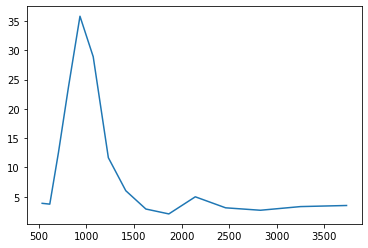

In [58]:
plt.plot(f_list, spike_rates)

### Labeling axes and other annotations

This graph may make sense, but it's ALWAYS a good idea to label things. The `xlabel` and `ylabel` functions are easy. Also, the `o-` option for `plot` also puts dots to indicate the actual data points. And one random note, the semicolon (`;`) on the last line prevents the extra output from displaying.

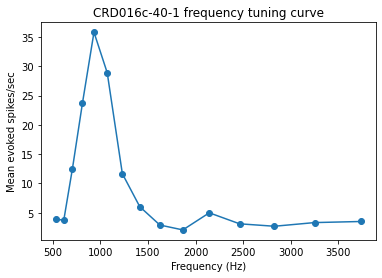

In [263]:
plt.plot(f_list, spike_rates, marker='o');
plt.xlabel('Frequency (Hz)')
plt.ylabel('Mean evoked spikes/sec')
plt.title(cell1_label + ' frequency tuning curve');

### Adding a second line to a plot

One other thing that helps interpretting tuning curves is to know the spontaneous firing rate of the neuron. We can measure that from the average spike rate during the 0.1 sec preceding every stimulus (since we happen to know that no tone was ever played during that time window).

In [83]:
all_start_times = stim[:,1]
all_start_times[:10]

array([0.1  , 0.6  , 1.6  , 2.1  , 4.882, 5.382, 5.882, 6.382, 7.382,
       7.882])

We define `pre_start_times` as 0.1 sec before each tone onset time, and then use the same strategy we used above to measure evoked rate. Now, however, we can average over all stimulus events to get a single spontaneous rate.

In [72]:
pre_duration = 0.1
pre_start_times = all_start_times - pre_duration
spont_count = 0
for s,e in zip(pre_start_times,all_start_times):
    spont_count += np.sum((spikes1>s) & (spikes1<=e))
spont_rate = spont_count/len(pre_start_times)/pre_duration
np.round(spont_rate,3)

1.992

We can use `axhline` to plot the spont rate as a horizontal line. Also, we assoicate a `label` with each line, which in turn is used to generate a `legend`.

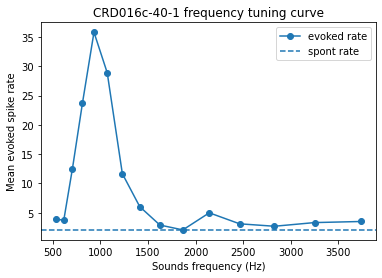

In [264]:
plt.plot(f_list, spike_rates, 'o-', label='evoked rate')
plt.axhline(y=spont_rate, linestyle='--', label='spont rate')
plt.xlabel('Sounds frequency (Hz)')
plt.ylabel('Mean evoked spike rate')
plt.title(f'{cell1_label} frequency tuning curve')
plt.legend();

### Analyzing tuning for a second neuron

Let's load data from a second single unit, which was recorded simulatenously with the first one. This unit was recorded from electrode number 50, while the previous one (CRD016c-40-1) was recorded from electrode 40.

In [265]:
spikes2 = np.loadtxt('data/CRD016c-50-1.csv', delimiter=',')
cell2_label = 'CRD016c-50-1'

Since this cell was recorded simultaneously, we can use the same `stim` matrix to guide analysis.

In [266]:
f=933
b = (stim[:,0]==f)
start_times = stim[b,1]
stop_times = stim[b,2]

spike_count = 0
for s,e in zip(start_times,stop_times):
    spike_count += np.sum((spikes1>s) & (spikes1<=e))
spike_rate = spike_count / stim_duration / len(start_times)
print(f"{cell2_label}, {f} Hz stimulus: evoked spike rate is {np.round(spike_rate,2)} spk/s")

CRD016c-50-1, 933 Hz stimulus: evoked spike rate is 35.79 spk/s


Let's compute a tuning curve for neuron 2. We can copy and paste code from above, but let's save the result to a new vector, `spike_rates2`, so that we don't overwrite the tuning curve for the first neuron.

In [267]:
f_list = np.unique(stim[:,0])
spike_rates2 = np.zeros(f_list.shape) # NOTE: intialize spike_rates2 here

for j,f in enumerate(f_list):
    b = (stim[:,0]==f)
    start_times = stim[b,1]
    stop_times = stim[b,2]
    
    spike_count = 0
    for s,e in zip(start_times,stop_times):
        # NOTE: replace spikes1 with spikes2
        spike_count += np.sum((spikes2>s) & (spikes2<=e))
    # NOTE: update values in spike_rates2
    spike_rates2[j] = spike_count / stim_duration / len(start_times)
    print(f"{cell2_label} {f} Hz stimulus: evoked spike rate is {np.round(spike_rates2[j],2)} spk/s")

CRD016c-50-1 536.0 Hz stimulus: evoked spike rate is 61.11 spk/s
CRD016c-50-1 616.0 Hz stimulus: evoked spike rate is 75.0 spk/s
CRD016c-50-1 707.0 Hz stimulus: evoked spike rate is 90.0 spk/s
CRD016c-50-1 812.0 Hz stimulus: evoked spike rate is 99.07 spk/s
CRD016c-50-1 933.0 Hz stimulus: evoked spike rate is 117.89 spk/s
CRD016c-50-1 1072.0 Hz stimulus: evoked spike rate is 96.67 spk/s
CRD016c-50-1 1231.0 Hz stimulus: evoked spike rate is 38.12 spk/s
CRD016c-50-1 1414.0 Hz stimulus: evoked spike rate is 21.88 spk/s
CRD016c-50-1 1625.0 Hz stimulus: evoked spike rate is 26.04 spk/s
CRD016c-50-1 1866.0 Hz stimulus: evoked spike rate is 16.46 spk/s
CRD016c-50-1 2144.0 Hz stimulus: evoked spike rate is 26.25 spk/s
CRD016c-50-1 2462.0 Hz stimulus: evoked spike rate is 25.62 spk/s
CRD016c-50-1 2828.0 Hz stimulus: evoked spike rate is 18.54 spk/s
CRD016c-50-1 3249.0 Hz stimulus: evoked spike rate is 20.56 spk/s
CRD016c-50-1 3732.0 Hz stimulus: evoked spike rate is 19.07 spk/s


### Exercise - Compute spont rate for a second neuron:

Same logic as for computing `spike_rates2`. Computer `spont_rate2` by copying code from above and modifying it to work for neuron 2 without overwriting results for neuron 1.

In [268]:
# We don't need to initialize these variables that describe the stimuli, 
# but here they are for reference
all_start_times = stim[:,1]
pre_duration = 0.1
pre_start_times = all_start_times - pre_duration

In [269]:
# Answer
spont_count = 0
for s,e in zip(pre_start_times,all_start_times):
    spont_count += np.sum((spikes2>s) & (spikes2<=e))
spont_rate2 = spont_count/len(pre_start_times)/pre_duration
np.round(spont_rate2,3)

15.458

Now we copy and paste plot a tuning curver for neuron 2

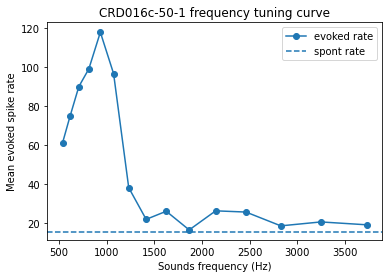

In [272]:
plt.plot(f_list, spike_rates2, 'o-', label='evoked rate')
plt.axhline(y=spont_rate2, linestyle='--', label='spont rate')
plt.xlabel('Sounds frequency (Hz)')
plt.ylabel('Mean evoked spike rate')
plt.title(f'{cell2_label} frequency tuning curve')
plt.legend();

### Exercise - Overlay the tuning curves:

We can see that this neuron has a similar best frequency near 1000 Hz, but a different shape. To help distinguish the cells, it would be nice to plot the two tuning curves on top of each other. Call the plot command twice to plot the two curves in the same graph. Don't worry about spont rate for the moment.

Bonus: can you use a different marker style to label points for neuron 2?

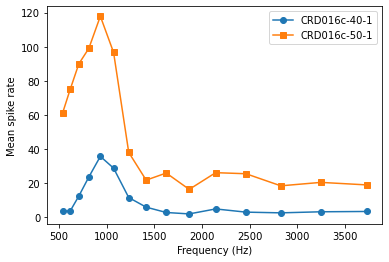

In [273]:
# Answer
plt.plot(f_list, spike_rates, 'o-', label=cell1_label)
plt.plot(f_list, spike_rates2, 's-', label=cell2_label)
plt.legend()
plt.xlabel('Frequency (Hz)')
plt.ylabel('Mean spike rate')
plt.legend();

Notice that `matplotlib` automatically plots the second curve in a different color, which is helpful for reading the graph.

For completeness, we want to add spont rate for each neuron. That's easy, right?

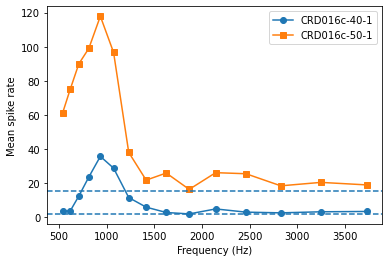

In [274]:
plt.plot(f_list, spike_rates, 'o-', label=cell1_label)
plt.plot(f_list, spike_rates2, 's-', label=cell2_label)
plt.axhline(spont_rate, linestyle='--')
plt.axhline(spont_rate2, linestyle='--')
plt.legend()
plt.xlabel('Frequency (Hz)')
plt.ylabel('Mean spike rate');

### Exercise - Change plot color

This is basically working, but notice that the `axhline` plots are not using appropriate colors. We can manually control plot colors with the `color` option. Replot the two tuning curves from above, but color the `hlines` to match the evoked activity. Colors can be specified many different ways. The most comprehensive is to specify the RGB (red-green-blue) HEX code (https://matplotlib.org/stable/tutorials/colors/colors.html). To help, we'll get a list of the automatic color cycle from `matplotlib`. You'll want spont rate for neuron 1 plotted in `color_set[0]` and spont rate for neuron 2 in `color_set[1]`.

In [179]:
color_set = plt.rcParams['axes.prop_cycle'].by_key()['color']
color_set

['#1f77b4',
 '#ff7f0e',
 '#2ca02c',
 '#d62728',
 '#9467bd',
 '#8c564b',
 '#e377c2',
 '#7f7f7f',
 '#bcbd22',
 '#17becf']

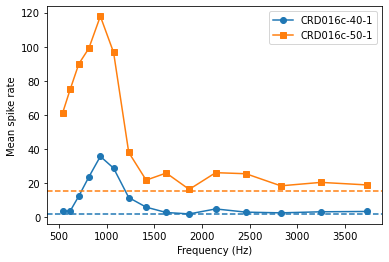

In [275]:
# Answer
plt.plot(f_list, spike_rates, 'o-', label=cell1_label)
plt.plot(f_list, spike_rates2, 's-', label=cell2_label)
plt.axhline(spont_rate, linestyle='--', color=color_set[0])
plt.axhline(spont_rate2, linestyle='--', color=color_set[1])
plt.legend()
plt.xlabel('Frequency (Hz)')
plt.ylabel('Mean spike rate');

## Generating raster plots

Tuning curves are great, but they hide a lot of details about the dynamics of neural activity. Raster plots provide a richer characterization of the response.

### Extract spike times

So far, we have been simply counting spikes that fell between stimulus onset and offset. Now, we'll like to plot when those spikes occured on each trial. Remember how to get spike times?

In [276]:
f = 933
b = (stim[:,0]==f)
start_times = stim[b,1]
stop_times = stim[b,2]

s = start_times[0]
e = stop_times[0]

spike_times = spikes1[(spikes1>s) & (spikes1<e)]
spike_times

array([1.62746667, 1.634     , 1.63826667, 1.64056667, 1.6427    ,
       1.6448    , 1.6471    , 1.74873333, 1.75463333, 1.7566    ,
       1.85063333])

For a raster, we want to know when spikes occurred on each trial, relative to the time of stimulus onset. So we need to subtract the stimulus onset time. Notice that all the spike times fall within the range 0-0.3 sec, since the stimulus was 0.3 sec long.

In [277]:
spike_times = spikes1[(spikes1>s) & (spikes1<e)] - s
spike_times

array([0.02746667, 0.034     , 0.03826667, 0.04056667, 0.0427    ,
       0.0448    , 0.0471    , 0.14873333, 0.15463333, 0.1566    ,
       0.25063333])

### Plotting a raster

How do we generate a useful plot?  This definitely doesn't make a ton of sense:

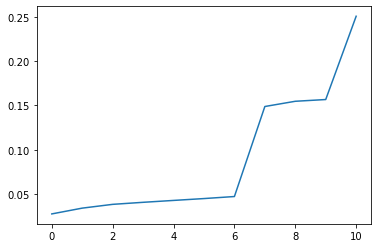

In [278]:
plt.plot(spike_times);

Instead, for a raster, we want to plot a row of dots, with time indicated by their position on the x-axis. Position on the y axis is a constant, indicating that they all occurred during the same trials. The `ones` function is quite handy here.

To plot dots without connecting lines, we provide some extra parameters to `plot`. 

Text(0.5, 0, 'Time from stimulus onset (s)')

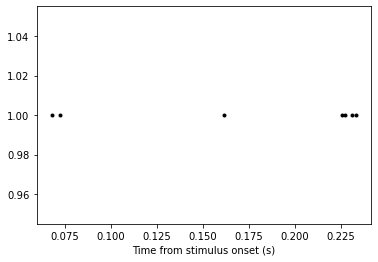

In [347]:
y = np.ones(spike_times.shape)
plt.plot(spike_times, y, linestyle='', marker='.', color='black')
plt.xlabel('Time from stimulus onset (s)')

This is such a common way to plot data, that there's a shortcut in `plot`, where you can simply pass the parameter `'k.'` after `x` and `y`.

Text(0.5, 0, 'Time from stimulus onset (s)')

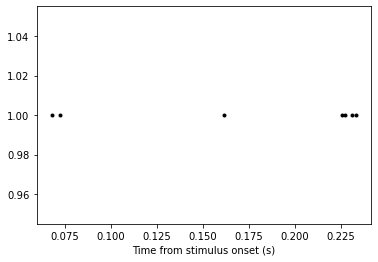

In [346]:
plt.plot(spike_times, y, 'k.')
plt.xlabel('Time from stimulus onset (s)')

Kind of making sense? You can see things better if you plot the raster for multiple trials. 

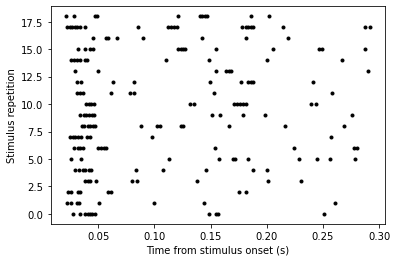

In [281]:
spike_counts = np.zeros(len(start_times))
plt.figure()
for i in range(len(start_times)):
    s = start_times[i]
    e = stop_times[i]
    
    spike_times = spikes1[(spikes1>s) & (spikes1<e)] - start_times[i]
    plt.plot(spike_times,np.ones(spike_times.shape)*i,'k.')
plt.xlabel('Time from stimulus onset (s)')
plt.ylabel('Stimulus repetition');

And it's helpful to include some silent periods pre- and post-stimulus.

Text(0.5, 0, 'Time from stimulus onset (s)')

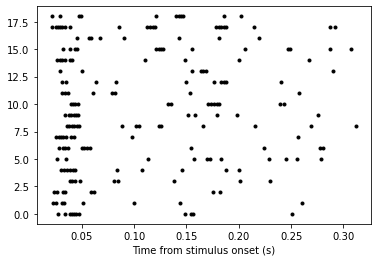

In [208]:
spike_counts = np.zeros(len(start_times))
plt.figure()
for i in range(len(start_times)):
    s = start_times[i]-0.1
    e = stop_times[i]+0.1
    
    spike_times = spikes1[(spikes1>s) & (spikes1<e)] - start_times[i]
    plt.plot(spike_times,np.ones(spike_times.shape)*i,'k.')
plt.xlabel('Time from stimulus onset (s)');

Wait a sec... Not much changed from the previous plot. Why is that? Turns out this neuron has a very low spontaneous rate, and there were no spikes at all before stimulus onset. Use the `xlim` function to make sure the x axis display properly.

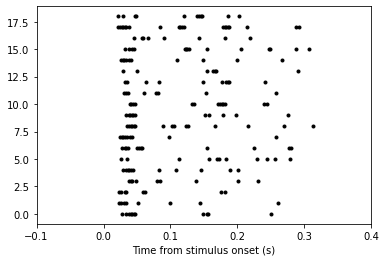

In [282]:
spike_counts = np.zeros(len(start_times))
plt.figure()
for i in range(len(start_times)):
    s = start_times[i]-0.1
    e = stop_times[i]+0.1
    
    spike_times = spikes1[(spikes1>s) & (spikes1<e)] - start_times[i]
    plt.plot(spike_times,np.ones(spike_times.shape)*i,'k.')
    
plt.xlabel('Time from stimulus onset (s)')
plt.xlim([-0.1, 0.4]);

### Exercise - Overlay vertical line:

It's helpful to mark when the sound turns on and off. Use `axvline` function (very similar to `axhline`) to mark the stimulus onset (0) and offset times (0.3). To make the lines stand out, use green dashed lines (`colors='lightgreen', linestyles='--'`). If you need help, try `plt.axvline?` Notice that this gives you A LOT of information. If you carefully read a few of these help displays, however, it gets easier to parse out the information you need.

In [284]:
plt.axvline?

Signature: plt.axvline(x=0, ymin=0, ymax=1, **kwargs)
Docstring:
Add a vertical line across the Axes.

Parameters
----------
x : float, default: 0
    x position in data coordinates of the vertical line.

ymin : float, default: 0
    Should be between 0 and 1, 0 being the bottom of the plot, 1 the
    top of the plot.

ymax : float, default: 1
    Should be between 0 and 1, 0 being the bottom of the plot, 1 the
    top of the plot.

Returns
-------
`~matplotlib.lines.Line2D`

Other Parameters
----------------
**kwargs
    Valid keyword arguments are `.Line2D` properties, with the
    exception of 'transform':

    Properties:
    agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array
    alpha: scalar or None
    animated: bool
    antialiased or aa: bool
    clip_box: `.Bbox`
    clip_on: bool
    clip_path: Patch or (Path, Transform) or None
    color or c: color
    dash_capstyle: `.CapStyle` or {'butt', 'projecting', 'round

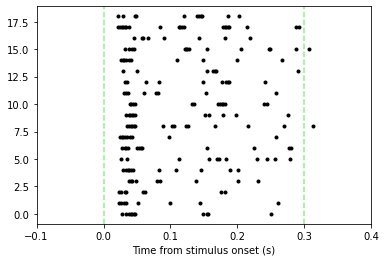

In [285]:
# Answer
spike_counts = np.zeros(len(start_times))
plt.figure()
for i in range(len(start_times)):
    s = start_times[i]-0.1
    e = stop_times[i]+0.1
    
    spike_times = spikes1[(spikes1>s) & (spikes1<e)] - start_times[i]
    plt.plot(spike_times,np.ones(spike_times.shape)*i,'k.')
    
plt.xlabel('Time from stimulus onset (s)')
plt.xlim([-0.1, 0.4])
plt.axvline(0, color='lightgreen', linestyle='--')
plt.axvline(0.3, color='lightgreen', linestyle='--');

### Stacking rasters for multiple stimuli

Now let's get fancy. We want a single raster plot to show responses to all the different stimuli. Let's loop through all the different stimulus frequencies, similar to the tuning curve calculation above, and stack the rasters on top of each other

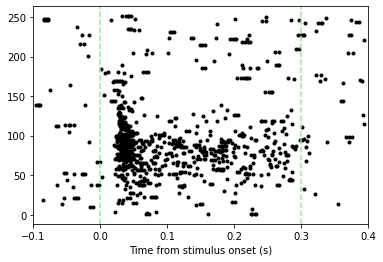

In [348]:
plt.figure()
row = 0
for j,f in enumerate(f_list):  # outer loop -- stimuli
    b = (stim[:,0]==f)
    start_times = stim[b,1]
    stop_times = stim[b,2]
    for i in range(len(start_times)):  # innter loop -- repetitions
        s = start_times[i]-0.1
        e = stop_times[i]+0.1

        spike_times = spikes1[(spikes1>s) & (spikes1<e)] - start_times[i]
        row += 1
        plt.plot(spike_times,np.ones(spike_times.shape)*row, 'k.')
        
plt.xlabel('Time from stimulus onset (s)')
plt.xlim([-0.1, 0.4]);
plt.axvline(0, color='lightgreen', linestyle='--')
plt.axvline(0.3, color='lightgreen', linestyle='--');

Make sense? This code can be hard to work with in the long run, though, because extraction of the spike times is mixed up with the plotting. It would be more modular if we could break the code into separate parts. First, figure out where all the black dots should be plotted, then in a separate step, plot all the points at once.

We want to collect information about spiking across all the stimulus events into one big matrix with one row per spike. Each row has two values, indicating the trial number and the time of that spike within the trial. There can of course be more than one spike per trial:

$$ R = \begin{bmatrix}
1 & t_1\\
1 & t_2\\
... & \\
251 & t_N
\end{bmatrix} $$

A useful fucntion for building a big matrix like this is `append`.

### Exercise - Appending matrices:

Say I have two matrices, `a` is 4 x 2 and `b` is 3 x 2. I want to append `b` to `a` along their columns (`axis=0`) so that the result, `c` is 7 x 2. Figure out how to use `np.append` to do this.

In [349]:
np.append?

Signature: np.append(arr, values, axis=None)
Docstring:
Append values to the end of an array.

Parameters
----------
arr : array_like
    Values are appended to a copy of this array.
values : array_like
    These values are appended to a copy of `arr`.  It must be of the
    correct shape (the same shape as `arr`, excluding `axis`).  If
    `axis` is not specified, `values` can be any shape and will be
    flattened before use.
axis : int, optional
    The axis along which `values` are appended.  If `axis` is not
    given, both `arr` and `values` are flattened before use.

Returns
-------
append : ndarray
    A copy of `arr` with `values` appended to `axis`.  Note that
    `append` does not occur in-place: a new array is allocated and
    filled.  If `axis` is None, `out` is a flattened array.

See Also
--------
insert : Insert elements into an array.
delete : Delete elements from an array.

Examples
--------
>>> np.append([1, 2, 3], [[4, 5, 6], [7, 8, 9]])
array([1, 2, 3, ..., 7, 8, 

In [289]:
a = np.array([[1, 2], [3, 4], [5, 6], [7, 8]])
b = np.array([[9, 10], [11, 12], [13, 14]])

# Answer
c = np.append(a, b, axis=0)
c

array([[ 1,  2],
       [ 3,  4],
       [ 5,  6],
       [ 7,  8],
       [ 9, 10],
       [11, 12],
       [13, 14]])

Say we want to append two 3x1 matrices to get a 3x2 matrix. Can you fix the error? 

In [365]:
a = np.zeros(3)
b = np.array([[1],[2],[3]])

c = np.append(a,b,axis=1)
c

AxisError: axis 1 is out of bounds for array of dimension 1

Now we put it all together to generate the big `data` matrix of spikes.

In [366]:
# pre-define the matrix with appropriate number of columns
row = 0
data = np.zeros((0,2))
first_trial_row=np.zeros(f_list.shape)

for j,f in enumerate(f_list):  # go through each unique stimulus
    # we're also keeping track of each row when a new stimulus occurs (see below)
    first_trial_row[j] = row
    b = (stim[:,0]==f)
    start_times = stim[b,1]
    stop_times = stim[b,2]
    for i in range(len(start_times)):  # go through each presentation of that stimulus
        s = start_times[i]-0.1
        e = stop_times[i]+0.1

        row += 1
        spike_times = spikes1[(spikes1>s) & (spikes1<e)] - start_times[i]
        this_data = np.zeros((len(spike_times),2))
        this_data[:,0] = row
        this_data[:,1] = spike_times
        data = np.append(data, this_data, axis=0)
data.shape

(857, 2)

Now plotting is straightforward

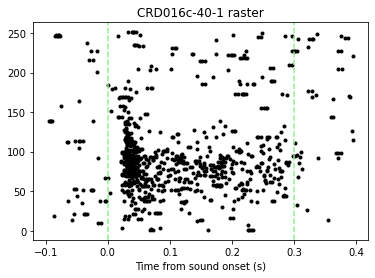

In [367]:
plt.plot(data[:,1], data[:,0], 'k.')
plt.axvline(0, color='lightgreen', linestyle='--')
plt.axvline(0.3, color='lightgreen', linestyle='--');
plt.xlabel('Time from sound onset (s)')
plt.title(cell1_label + ' raster');

One more thing. We want the axis labels to mean something. We're going to use the `yticks` command to hack the way the y axis is labeled, using the `first_trial_row` vector to label the first row where a particular stimulus was presented.

In [368]:
first_trial_row

array([  0.,  18.,  34.,  51.,  69.,  88., 103., 119., 135., 151., 167.,
       183., 199., 215., 233.])

`yticks` let's you specify where to add a ylabel and what value to display

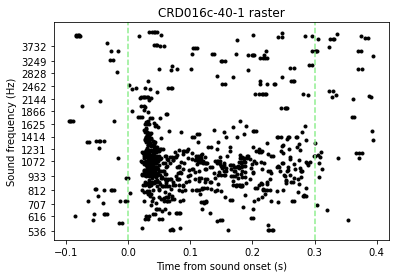

In [369]:
plt.plot(data[:,1], data[:,0], 'k.')
plt.axvline(0, color='lightgreen', linestyle='--')
plt.axvline(0.3, color='lightgreen', linestyle='--');
plt.yticks(first_trial_row, f_list.astype(int))
plt.ylabel('Sound frequency (Hz)')
plt.xlabel('Time from sound onset (s)')
plt.title(cell1_label + ' raster');

### Exercise - Plot raster for a new cell:

Generate a raster for cell #2. 

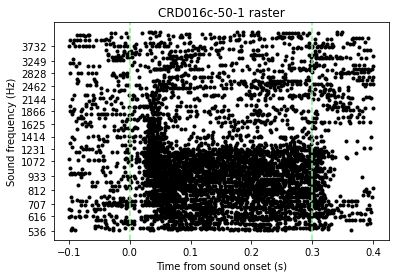

In [384]:
#Answer
# pre-define the matrix with appropriate number of columns
row = 0
data = np.zeros((0,2))
first_trial_row=np.zeros(f_list.shape)

for j,f in enumerate(f_list):
    # we're also keeping track of each row when a new stimulus occurs
    first_trial_row[j] = row
    b = (stim[:,0]==f)
    start_times = stim[b,1]
    stop_times = stim[b,2]
    for i in range(len(start_times)):
        s = start_times[i]-0.1
        e = stop_times[i]+0.1

        row += 1
        spike_times = spikes2[(spikes2>s) & (spikes2<e)] - start_times[i]
        this_data = np.zeros((len(spike_times),2))
        this_data[:,0] = row
        this_data[:,1] = spike_times
        data = np.append(data, this_data, axis=0)

plt.plot(data[:,1], data[:,0], 'k.')
plt.axvline(0, color='lightgreen', linestyle='--')
plt.axvline(0.3, color='lightgreen', linestyle='--');
plt.xlabel('Time from sound onset (s)')
plt.yticks(first_trial_row, f_list.astype(int))
plt.ylabel('Sound frequency (Hz)')
plt.title(cell2_label + ' raster');

### Bonus. Tweaking the x axis for log-spaced tones.

Remember this tuning curve?

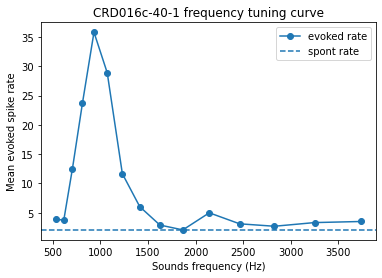

In [381]:
f_list = np.unique(stim[:,0])
spike_rates = np.zeros_like(f_list)
for j,f in enumerate(f_list):
    b = (stim[:,0]==f)
    start_times = stim[b,1]
    stop_times = stim[b,2]
    
    spike_count = 0
    for s,e in zip(start_times,stop_times):
        # NOTE: replace spikes1 with spikes2
        spike_count += np.sum((spikes1>s) & (spikes1<=e))
    spike_rates[j] = spike_count / stim_duration / len(start_times)

all_start_times = stim[:,1]
pre_duration = 0.1
pre_start_times = all_start_times - pre_duration

spont_count = 0
for s,e in zip(pre_start_times,all_start_times):
    spont_count += np.sum((spikes1>s) & (spikes1<=e))
spont_rate = spont_count/len(pre_start_times)/pre_duration

plt.plot(f_list, spike_rates, 'o-', label='evoked rate')
plt.axhline(y=spont_rate, linestyle='--', label='spont rate')
plt.xlabel('Sounds frequency (Hz)')
plt.ylabel('Mean evoked spike rate')
plt.title(cell1_label + ' frequency tuning curve')
plt.legend();

It's pretty clear now that tones near 1000 Hz evoke strong responses, compared to lower or higher frequencies. But there are a few things we can do to make this easier to read.

First, the auditory system works in a logorithmic scale. That is, the difference between 500  and 1000 Hz is perceived as similar to the difference between 1000 and 2000 Hz. The experiment played tones with logorithmic spacing to match the perceptual space, and you can see that the dots are more closely spaced on the x-axis at lower sound frequencies. There are a few ways to plot with even spacing. One option is to use the `semilogx` function.

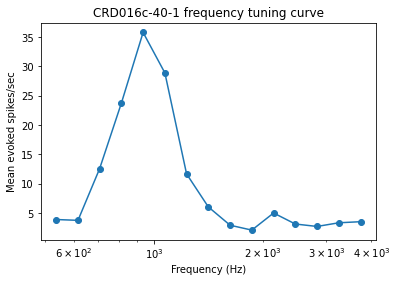

In [382]:
plt.semilogx(f_list, spike_rates, 'o-')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Mean evoked spikes/sec')
plt.title(cell1_label + ' frequency tuning curve');

Notice that the labels on the x axis are weirdly spaced and hard to read. An alternative is to manually overwrite the x axis labels. If we only pass a single vector to `plot`, the x value will be inferred to be 1 ... `len(spike_rates)`. Then we can manually relabel the x axis with `xticks`.

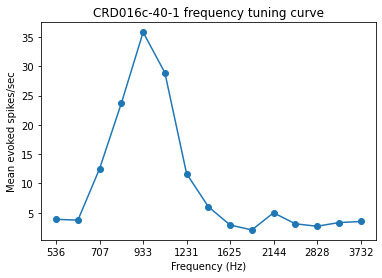

In [383]:
plt.plot(spike_rates, 'o-')
xticks = np.arange(0,len(f_list),2)
plt.xticks(xticks,f_list[xticks].astype(int))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Mean evoked spikes/sec')
plt.title(cell1_label + ' frequency tuning curve');